In [ ]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import pywt

In [127]:
# Loop through each audio file in the dataset directory
for filename in os.listdir("/content/drive/MyDrive/real_replay/genuine/"):
    if filename.endswith(".flac"):
        # Load the audio file
        samples, sr = librosa.load("/content/drive/MyDrive/real_replay/genuine/" + filename)
        coeffs = pywt.wavedec(samples, wavelet='db1', level=3)
#         print(coeffs)
        

In [129]:
# Loop through each audio file in the dataset directory
for filename in os.listdir("/content/drive/MyDrive/real_replay/spoof/"):
    if filename.endswith(".flac"):
        # Load the audio file
        samples, sr = librosa.load("/content/drive/MyDrive/real_replay/spoof/" + filename)
        coeffs = pywt.wavedec(samples, wavelet='db1', level=3)
#         print(coeffs)
        

In [130]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.io.wavfile import read

#Keras
import keras
print("Importing required modules completed")
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D




for dirname, _, filenames in os.walk('asv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))






header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' label'
header = header.split()





Importing required modules completed


In [131]:
import csv
import os
import librosa
import numpy as np
import pywt

# Define the header of the CSV file
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' label'

# Define the list of types of speech samples
types = ['genuine', 'spoof']

# Create the CSV file and write the header
with open('dataset.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header.split())

# Loop through the types of speech samples
for speech_type in types:
    # Loop through the speech samples in the current type
    for filename in os.listdir(f'/content/drive/MyDrive/real_replay/{speech_type}'):
        speech_name = f'/content/drive/MyDrive/real_replay/{speech_type}/{filename}'
        y, sr = librosa.load(speech_name, mono=True, duration=30)
        
        # Apply wavelet decomposition with level=3
        coeffs = pywt.wavedec(y, wavelet='db1', level=13)
        x = np.concatenate(coeffs)
        
        # Extract features
        chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
        rmse = librosa.feature.rms(y=x)
        spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(x)
        mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
        
        # Create a row for the current speech sample with all the features and the label
        row = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            row += f' {np.mean(e)}'
        row += f' {speech_type}'
        
        # Write the row to the CSV file
        with open('dataset.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(row.split())


In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [133]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('dataset.csv')

In [134]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2, random_state=42)

In [135]:
# Remove the filename column from the X array
X = df.drop(['label', 'filename'], axis=1).values

In [136]:
# Convert the labels to numerical values
y = pd.get_dummies(df['label']).values


In [137]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

In [138]:
# Reshape the input data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [139]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

In [140]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [141]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
34/34 [==============================] - 4s 20ms/step - loss: 0.5357 - accuracy: 0.7731 - val_loss: 0.4837 - val_accuracy: 0.8089
Epoch 2/30
34/34 [==============================] - 0s 9ms/step - loss: 0.4508 - accuracy: 0.7958 - val_loss: 0.4109 - val_accuracy: 0.8089
Epoch 3/30
34/34 [==============================] - 0s 7ms/step - loss: 0.3985 - accuracy: 0.8046 - val_loss: 0.3695 - val_accuracy: 0.8071
Epoch 4/30
34/34 [==============================] - 0s 7ms/step - loss: 0.3503 - accuracy: 0.8343 - val_loss: 0.3542 - val_accuracy: 0.8182
Epoch 5/30
34/34 [==============================] - 0s 8ms/step - loss: 0.3293 - accuracy: 0.8497 - val_loss: 0.3268 - val_accuracy: 0.8237
Epoch 6/30
34/34 [==============================] - 0s 7ms/step - loss: 0.3501 - accuracy: 0.8404 - val_loss: 0.3252 - val_accuracy: 0.8423
Epoch 7/30
34/34 [==============================] - 0s 8ms/step - loss: 0.3053 - accuracy: 0.8608 - val_loss: 0.3267 - val_accuracy: 0.8404
Epoch 8/30
34/34 [=

In [142]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

17/17 [==============================] - 0s 4ms/step - loss: 0.0908 - accuracy: 0.9740
Accuracy: 0.9740259647369385


In [ ]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.478078693151474
Test accuracy: 0.7909091114997864


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, roc_curve, confusion_matrix


In [ ]:
# Use the model to predict labels for the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute precision, recall, and F1 score
report = classification_report(y_true, y_pred)
print(report)


7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       111
           1       0.86      0.69      0.77       109

    accuracy                           0.79       220
   macro avg       0.80      0.79      0.79       220
weighted avg       0.80      0.79      0.79       220



In [ ]:
from sklearn.metrics import classification_report

# Use the model to predict labels for the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute precision, recall, and F1 score without support
report_dict = classification_report(y_true, y_pred, zero_division=0, output_dict=True)
precision = report_dict['weighted avg']['precision']
recall = report_dict['weighted avg']['recall']
f1_score = report_dict['weighted avg']['f1-score']

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)


7/7 [==============================] - 0s 3ms/step
Precision: 0.8026798972352511
Recall: 0.7909090909090909
F1 score: 0.7886006265397366


7/7 [==============================] - 0s 3ms/step


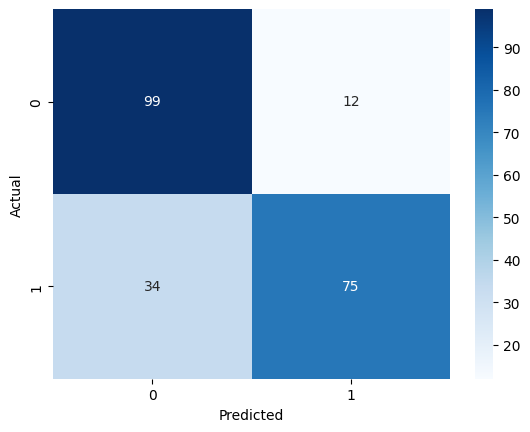

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# true labels and predicted labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# add labels to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')

# show plot
plt.show()

In [ ]:
n_samples = X_test.shape[0]
print("Total number of samples:", n_samples)


Total number of samples: 220


In [ ]:
# Calculate the accuracy
total_correct = cm[0,0] + cm[1,1] # total number of correct predictions
total_predictions = np.sum(cm) # total number of predictions
accuracy = total_correct / total_predictions # accuracy = total correct / total predictions

print('Accuracy:', accuracy)


Accuracy: 0.7909090909090909


7/7 [==============================] - 0s 3ms/step


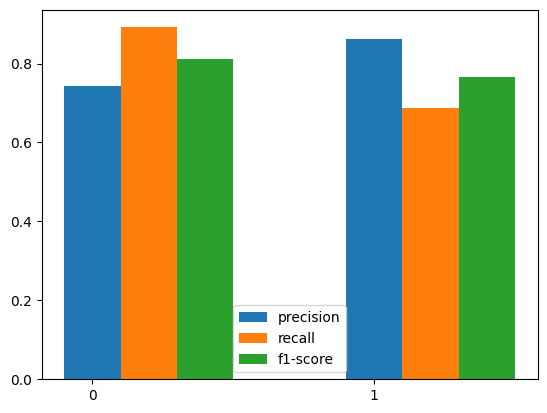

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Use the model to predict labels for the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute precision, recall, and F1 score
report = classification_report(y_true, y_pred, output_dict=True)
classes = [str(c) for c in range(len(report) - 3)]
metrics = ['precision', 'recall', 'f1-score']

# Create a bar chart for all metrics
fig, ax = plt.subplots()
width = 0.2
x = np.arange(len(classes))
for i, metric in enumerate(metrics):
    values = [report[c][metric] for c in classes]
    ax.bar(x + i*width, values, width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()
plt.show()


In [ ]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# Use the model to predict labels for the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the false positive rate and true positive rate using ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Compute the EER using the intersection of the ROC curve with the line FPR = FNR
fnr = 1 - tpr
eer_threshold = brentq(lambda x : 1. - interp1d(fpr, tpr)(x) - x, 0., 1.)
eer = 1. - interp1d(fpr, tpr)(eer_threshold)
print('Equal Error Rate:', eer)


7/7 [==============================] - 0s 3ms/step
Equal Error Rate: 0.2591143151390308
